# Problem a)

[584, 591, 590, 578, 594, 598, 597, 600]


<Container object of 8 artists>

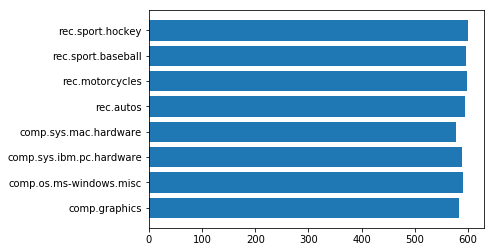

In [2]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import numpy as np


categories =['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
dataLen = []
train_datas =[]
for cat in categories:
    raw_train = fetch_20newsgroups(subset='train',categories = [cat],shuffle=True, random_state =42)
    train_datas.append(raw_train.data)
    dataLen.append(len(raw_train.data))
print(dataLen)
# the histogram of the data
plt.barh(categories,dataLen)

# Problem b)

### Stopping words

In [1]:
# tokenize -> stem -> remove punctuation & stop words
import numpy as np
import nltk
import matplotlib.pyplot as plt
from pickle import dump

from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('stopwords' )
stop_words_en = stopwords.words('english')
from string import punctuation
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shuangyu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### lemmatizer

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import pos_tag
#nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
def lemmatize_sent_demo(text): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]
lemmatize_sent('He is walking to school')

[nltk_data] Downloading package punkt to /Users/shuangyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shuangyu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shuangyu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['h',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'w',
 'a',
 'l',
 'k',
 'i',
 'n',
 'g',
 ' ',
 't',
 'o',
 ' ',
 's',
 'c',
 'h',
 'o',
 'o',
 'l']

In [3]:
# overwrite analyzer with callable function:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

In [4]:
# tokenize -> stem -> remove punctuation & stop words
import numpy as np
import matplotlib.pyplot as plt
from pickle import dump

from sklearn.datasets import fetch_20newsgroups
comp_categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=comp_categories+rec_categories, shuffle=True, random_state=42,)
twenty_test = fetch_20newsgroups(subset='test', categories=comp_categories+rec_categories, shuffle=True, random_state=42,)
counts = []

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
min_dfs = range(1,5)
for min_df in min_dfs:
    count_vect1 = CountVectorizer(min_df=min_df,analyzer=stem_rmv_punc)
    X_train_counts1 = count_vect1.fit_transform(twenty_train.data)
    print (X_train_counts1.shape)

(4732, 69068)
(4732, 24849)
(4732, 16292)
(4732, 12640)


In [12]:
#TDIDF of 8 classes
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(X_train_counts1)

# probelm c)

In [9]:
#TFICF 
new_cats = ["comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", "misc.forsale", "soc.religion.christian"]
new_bigstring = []
for cat in new_cats:
    new_train = fetch_20newsgroups(subset='train',categories = [cat], shuffle=True, random_state =42)
    #stem
    new_bigstring.append(" ".join(new_train.data))
# print(len(new_bigstring))
count_vect_c = CountVectorizer(min_df=min_df,analyzer=stem_rmv_punc)
new_count= count_vect_c.fit_transform(new_bigstring)

In [10]:
print(new_count.shape)

(4, 1759)


In [11]:
# find the top 10
new_sort = new_count.toarray()
#print(type(new_sort))
index=[]
i = 0
for termCount in new_sort:
    termCount.sort()
    index.append(np.argwhere(new_count.toarray()[i]>=termCount[::-1][:10][-1]))
    i+=1
#print not in order
for x in range(len(index)):
    print([count_vect_c.get_feature_names()[i[0]] for i in index[x] ])

['card', 'com', 'controller', 'drive', 'edu', 'ide', 'line', 'organization', 'subject', 'use']
['apple', 'drive', 'edu', 'line', 'mac', 'organization', 'post', 'problem', 'subject', 'use']
['com', 'edu', 'line', 'new', 'offer', 'organization', 'post', 'sale', 'subject', 'university']
['believe', 'edu', 'god', 'know', 'line', 'organization', 'people', 'say', 'subject', 'think']


# Problem d)

In [13]:
#LSI
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=50)
train_LSI = SVD.fit_transform(train_tfidf)

print(train_LSI.shape)


(4732, 50)


In [15]:
#NMF
from sklearn.decomposition import NMF
model = NMF(n_components=50, init='random', random_state=0)
train_NMF = model.fit_transform(train_tfidf)
print(train_NMF.shape)

(4732, 50)


# Problem g)

In [22]:
# #combine sub documents
# bin_class_data = []

# #0 for 'comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware'
# bin_class_data.append(raw_train.data[0]+raw_train.data[1]+raw_train.data[2]+raw_train.data[3])
# #1 for 'rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey'
# bin_class_data.append(raw_train.data[4]+raw_train.data[5]+raw_train.data[6]+raw_train.data[7])

# print(len(raw_train.data),len(bin_class_data),len(bin_class_data[0]))
# raw_train.target>3

4732 2 7223


array([ True,  True,  True, ...,  True,  True, False])

In [26]:
bin_class_count = vectorizer_df2.fit_transform(raw_train.data)
bin_class_tfidf = tfidf_transformer.fit_transform(bin_class_count)

#LSI deduction
train_LSI = SVD.fit_transform(bin_class_tfidf)
#NMF
train_NMF = model.fit_transform(bin_class_tfidf)

In [27]:
#naive Bayes
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_NMF, raw_train.target>3)



In [34]:
#simple trial
docs_new = ['He is an OS developer', 'his car is awsome']

X_new_counts = vectorizer_df2.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
W_test = model.transform(X_new_tfidf)

predicted = clf.predict(W_test)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, ["tech","rec"][category]))


'He is an OS developer' => tech
'his car is awsome' => rec


/Users/shuangyu/ECE219_projects/project_1/.env/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  # Remove the CWD from sys.path while we load stuff.
